In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats
%matplotlib inline

In [57]:
path1 = 'https://raw.githubusercontent.com/chirayukong/infsci2725-spring-2018/master/lecture-06/'
path2 = '/Users/ziyuehan/Downloads/2018Spring/Data Analytics/Assignment/5/'
d_train = pd.read_csv(path1 + 'train.csv')
d_test = pd.read_csv(path1 + 'test.csv')
y_test = pd.read_csv(path2 + 'gender_submission.csv')['Survived']

In [3]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
d_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 1 Describing data

## 1.1 Survived

In [6]:
d_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5,0.98,'Counts of survival')

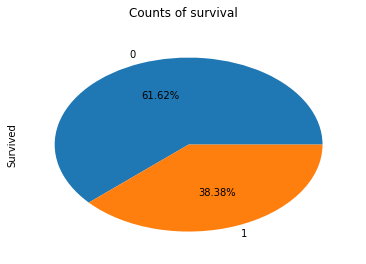

In [7]:
d_train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of survival')

## 1.2 Pclass

In [7]:
d_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5,0.98,'Counts of Pclass')

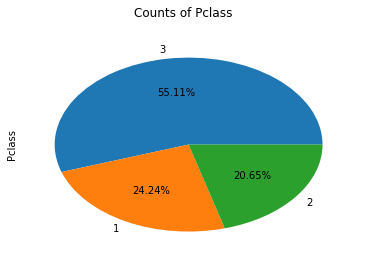

In [8]:
#plot the counts of each value in Pclass
d_train['Pclass'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of Pclass')

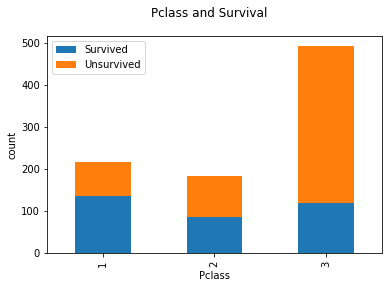

In [9]:
Survived_0 = d_train.Pclass[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Pclass[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Pclass and Survival")
plt.xlabel(u"Pclass") 
plt.ylabel(u"count") 
plt.show()

### According to the above graphs, it seems that people in the 1st class may stand more chances to survive. Therefore, we assume that the Pclass may affect the survival. Also, data of Pclass is numeric and does not have null, so we did not change anything about Pclass when we processed data.

## 1.3 Sex

In [10]:
d_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5,0.98,'Counts of Sex')

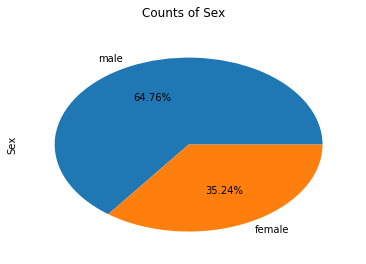

In [11]:
d_train['Sex'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of Sex')

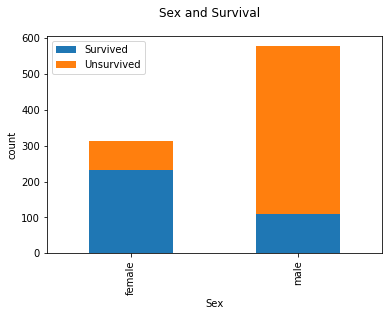

In [12]:
Survived_0 = d_train.Sex[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Sex[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Sex and Survival")
plt.xlabel(u"Sex") 
plt.ylabel(u"count") 
plt.show()

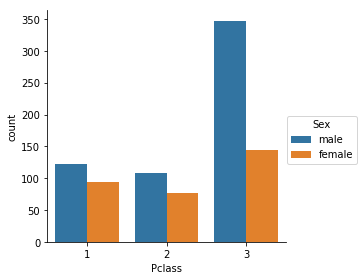

In [13]:
# the relationship between sex, pclass and survival
_ = sns.factorplot('Pclass', data=d_train, hue='Sex', kind="count")

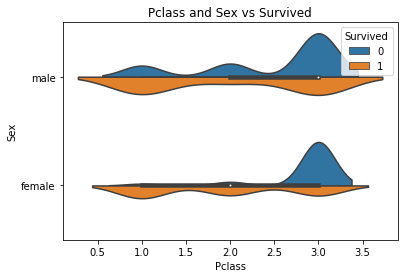

In [14]:
_ = sns.violinplot("Pclass", "Sex", hue="Survived", data=d_train, split=True)
_.set_title('Pclass and Sex vs Survived')

plt.show()

### According to the above graphs, it seems that women is more possible to survive, so we thought this data would have influence on survival. 

## 1.4 Age

In [15]:
d_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [16]:
d_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

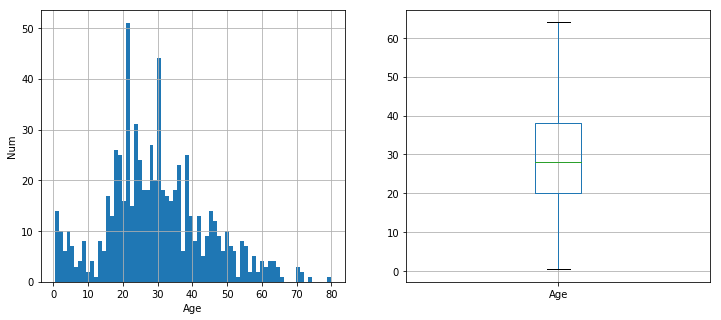

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(121)
d_train['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
d_train.boxplot(column='Age', showfliers=False)
plt.show()

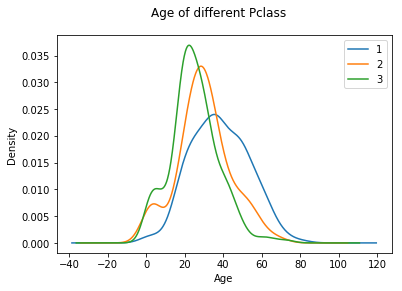

In [18]:
d_train.Age[d_train.Pclass == 1].plot(kind='kde')   
d_train.Age[d_train.Pclass == 2].plot(kind='kde')
d_train.Age[d_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.suptitle("Age of different Pclass")
plt.legend((1, 2, 3),loc='best') # sets our legend for our graph

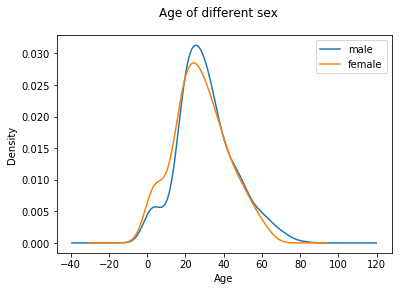

In [19]:
d_train.Age[d_train.Sex == 'male'].plot(kind='kde')   
d_train.Age[d_train.Sex == 'female'].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.suptitle("Age of different sex")
plt.legend(('male', 'female'),loc='best') # sets our legend for our graph

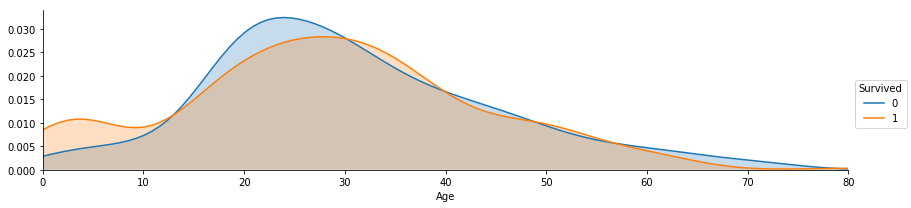

In [20]:
facet = sns.FacetGrid(d_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, d_train['Age'].max()))
facet.add_legend()

### According to the above graphs, age is an effect of survival. However, age has null. In order not to affect the following steps and not to lower the accuracy of the final prediction, we used randomforest to fill the age.
### Also, in order to classify people better in the Titanic, we created a new Row called Person, which classified people into four classes, including children who are under 14, and the elders who are older than 65, male and female. 

## 1.5 SibSp

In [21]:
d_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5,0.98,'Counts of SibSp')

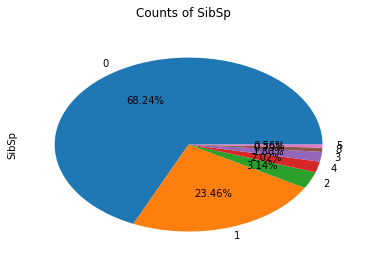

In [90]:
d_train['SibSp'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of SibSp')

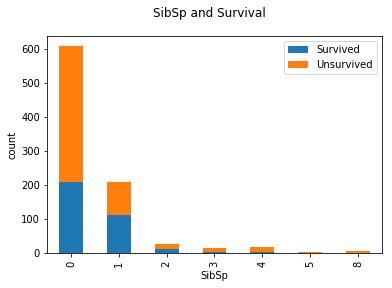

In [93]:
Survived_0 = d_train.SibSp[d_train.Survived == 0].value_counts()
Survived_1 = d_train.SibSp[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"SibSp and Survival")
plt.xlabel("SibSp") 
plt.ylabel("count") 
plt.show()

## 1.6 Parch

In [94]:
d_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5,0.98,'Counts of Parch')

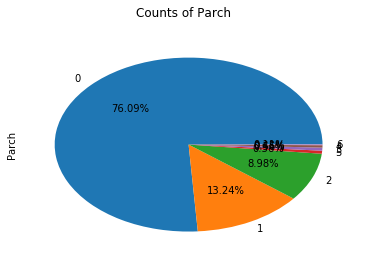

In [95]:
d_train['Parch'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of Parch')

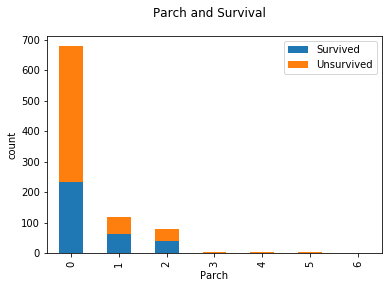

In [96]:
Survived_0 = d_train.Parch[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Parch[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Parch and Survival")
plt.xlabel("Parch") 
plt.ylabel("count") 
plt.show()

### Based on the graphs of SibSp and Parch, we thought these two kinds of data should be included into the features of inputs.

## 1.7 Fare

In [97]:
d_train['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

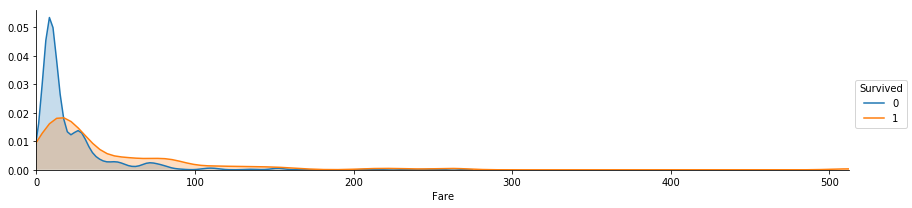

In [100]:
facet = sns.FacetGrid(d_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, d_train['Fare'].max()))
facet.add_legend()

## 1.8 Cabin

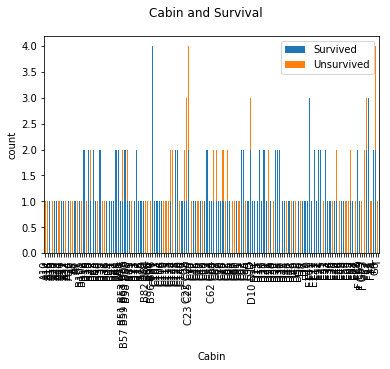

In [101]:
Survived_0 = d_train.Cabin[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Cabin[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Cabin and Survival")
plt.xlabel("Cabin") 
plt.ylabel("count") 
plt.show()

## 1.9 Embarked

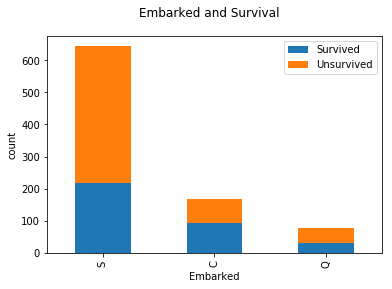

In [102]:
Survived_0 = d_train.Embarked[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Embarked[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Embarked and Survival")
plt.xlabel("Embarked") 
plt.ylabel("count") 
plt.show()

### Based on the above Embarked, Fare and Cabin data, we failed to find relationship between these data and survival, but in order not to affect the accurcy, we added these data into the features of inputs.

# 2 Prepare and cleanse the data

### Based on the above analysis, we processed the data as the following shows.

In [21]:
from sklearn.ensemble import RandomForestRegressor
import re
def modify(df):
    
    #Fare:
    # the fare data in the test.csv has null.
    if(df.Fare.isnull().any()):
        df['Fare'].fillna(df['Fare'].value_counts().max(), inplace = True)
    
    #Age
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    #Cabin
    df.loc[ (df.Cabin.notnull()), 'Cabin_exist' ] = "1"
    df.loc[ (df.Cabin.isnull()), 'Cabin_exist' ] = "0"
    
    #Embarked:
    df['Embarked'].fillna('S',inplace=True)
    df['Embarked'].replace('S', 0,inplace=True)
    df['Embarked'].replace('C', 1,inplace=True)
    df['Embarked'].replace('Q', 2,inplace=True)
    
    
    #Person:
    def male_female_child_elder(df):
        age,sex = df[['Age', 'Sex']]
        # Compare the age, otherwise leave the sex
        # Improvement: 16 --> 14
        if age <= 14:
            return 'child'
        elif age > 65:
            return 'elder'
        else:
            return sex
    df['Person'] = df[['Age', 'Sex']].apply(male_female_child_elder, axis=1)
    
    
    #Replace person to numbers
    df.replace('female',0, inplace=True)
    df.replace('male',1, inplace=True)
    df.replace('child',2, inplace=True)
    df.replace('elder',3, inplace=True)
    
    
    
    #name:
    #add title according to names
    df['Title'] = df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
                                 
    title_Dict = {}
    title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
    title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
    title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
    title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
    title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
    title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
    df['Title'] = df['Title'].map(title_Dict)
    
    df['Title'].replace('Officer',0, inplace=True)
    df['Title'].replace('Royalty',1, inplace=True)
    df['Title'].replace('Mrs',2, inplace=True)
    df['Title'].replace('Miss',3, inplace=True)
    df['Title'].replace('Mr',4, inplace=True)
    df['Title'].replace('Master',5, inplace=True)
    
    
    #Dummy variables
    dummies_Cabin_exist = pd.get_dummies(df['Cabin_exist'], prefix= 'Cabin_exist')
    dummies_Embarked = pd.get_dummies(df['Embarked'], prefix= 'Embarked')
    dummies_Sex = pd.get_dummies(df['Sex'], prefix= 'Sex')
    dummies_Pclass = pd.get_dummies(df['Pclass'], prefix= 'Pclass')
    df = pd.concat([df, dummies_Cabin_exist, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
    df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
   
    return df    

In [58]:
# Modify the train dataset
d1_train = modify(d_train)
d1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Cabin_exist      891 non-null object
Person           891 non-null int64
Title            891 non-null int64
Cabin_exist_0    891 non-null uint8
Cabin_exist_1    891 non-null uint8
Embarked_0       891 non-null uint8
Embarked_1       891 non-null uint8
Embarked_2       891 non-null uint8
Sex_0            891 non-null uint8
Sex_1            891 non-null uint8
Pclass_1         891 non-null uint8
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
dtypes: float64(2), int64(6), object(1), uint8(10)
memory usage: 71.4+ KB


In [23]:
d1_train['Person'].describe()

count    891.000000
mean       0.815937
std        0.635834
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Person, dtype: float64

In [24]:
d1_train['Person'].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    2
8    0
9    2
Name: Person, dtype: int64

In [25]:
# Test whether the age is modified.
d1_train['Cabin_exist'].head(10)

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: Cabin_exist, dtype: object

In [59]:
# Modify the test dataset
d1_test = modify(d_test)
d1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
PassengerId      418 non-null int64
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
Cabin_exist      418 non-null object
Person           418 non-null int64
Title            418 non-null int64
Cabin_exist_0    418 non-null uint8
Cabin_exist_1    418 non-null uint8
Embarked_0       418 non-null uint8
Embarked_1       418 non-null uint8
Embarked_2       418 non-null uint8
Sex_0            418 non-null uint8
Sex_1            418 non-null uint8
Pclass_1         418 non-null uint8
Pclass_2         418 non-null uint8
Pclass_3         418 non-null uint8
dtypes: float64(2), int64(5), object(1), uint8(10)
memory usage: 30.3+ KB


# 3 Models

## 3.1 Load inputs

In [60]:
# We added the elements that we thought are relevant to the survival of people in Titanic.
# features = ['Pclass', 'SibSp',  'Parch', 'Sex', 'Embarked','Age','Fare','person', 'Title']
train_df = d1_train.filter(regex='Survived|Person|Age|SibSp|Parch|Fare_.*|Cabin_exist_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y means survial
y_train = train_np[:, 0]

# X means feature 
x_train = train_np[:, 1:]
x_test = d1_test.filter(regex='Person|Age|SibSp|Parch|Fare_.*|Cabin_exist_.*|Embarked_.*|Sex_.*|Pclass_.*')
inputs = x_train, y_train, x_test

## 3.2 Model selection

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


def models():
    return [LogisticRegression(),
            SVC(),
            LinearSVC(),
            RandomForestClassifier(),
            KNeighborsClassifier(),
            GaussianNB(),
            DecisionTreeClassifier()]

In [61]:
def name(model):
    return model.__class__.__name__


def best_model(model2predict):
    score_df = series_best_first(model2predict)
    print(score_df)
    return score_df.keys()[0]


def series_best_first(model2predict):
    model2score = {k: v[1] for k, v in model2predict.items()}
    return pd.Series(model2score).sort_values(ascending=False)


def write_submission(predict, submission_csv):
    submission = pd.DataFrame({
        "PassengerId": d1_test["PassengerId"],
        "Survived": predict
    })
    submission.to_csv(submission_csv, index=False)
    return pd.read_csv(submission_csv).tail(10)

In [63]:
def predict_and_score(model, inputs):
    X, y, X_test = inputs
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return y_pred, model.score(X, y)


table = {name(m): predict_and_score(m, inputs) for m in models()}
model = best_model(table)
#write_submission(int(table[model][0]), 'submission.csv')

DecisionTreeClassifier    0.958474
RandomForestClassifier    0.941639
KNeighborsClassifier      0.868687
SVC                       0.842873
LogisticRegression        0.810325
LinearSVC                 0.783389
GaussianNB                0.775533
dtype: float64


# 3.3 Model selection based on the logisticRegression

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test).astype(np.int64)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission_LR.csv')

[[248  18]
 [ 14 138]]
the accuracy is : 0.923444976077


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


## 3.4 Model selection based on the KNeighborsClassifier

In [68]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test).astype(np.int64)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission_KN.csv')

[[227  39]
 [ 31 121]]
the accuracy is : 0.832535885167


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


## 3.5 Model selection based on the SVC

In [69]:
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test).astype(np.int64)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission_svc.csv')

[[251  15]
 [  7 145]]
the accuracy is : 0.947368421053


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


## 3.6 Model selection based on the LinearSVC

In [70]:
classifier = LinearSVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test).astype(np.int64)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission_LSVC.csv')

[[212  54]
 [  3 149]]
the accuracy is : 0.863636363636


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


## 3.7 Model selection based on the GaussianNB

In [71]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test).astype(np.int64)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission_GNB.csv')

[[215  51]
 [  4 148]]
the accuracy is : 0.868421052632


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


# 4 Kaggle submission

## We used submission_LR to submit in the kaggle, and the score is 0.77511
https://www.kaggle.com/lairuofei

# 5 Answer the below questions about SettingWithCopyWarning in pandas

## 5.1 What is SettingWithCopyWarning? Please summarize.

### Answer
some actions in pandas can return a view of your data, and others will return a copy. This potentially causes problem when we try to make changes. Depending on what we're doing we might want to be modifying the original dataset, or we want to modify only the copied one. The warning is letting us know that our code may have done one, when we want it to have done the other.

## 5.2 How did you make sure that the warning is not applicable in your cases?

In [95]:
d_train['Age'].describe()

count    891.000000
mean      29.647248
std       13.629879
min        0.420000
25%       21.000000
50%       29.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

### Answer
The Modify function we created needs to change some values in the train and test data. And after this Modify function was executed, we checked the values that should be changed according to the function. As the above codes show, before the modify function, the count of Age is 714, the mean is 29.699118, and std = 14.526497. However, after the Modify function was executed, the count of Age is 891, the mean is 29.647248, the std = 13.629879. Therefore, we can make sure that the warning is not applicable in our cases.

## 5.3 What can you do to avoid the warning according to the web? Please summarize.

### Answer
1.To prevent the warning in this case, the solution is to explicitly tell pandas to make a copy when we create the new dataframe;

2.The solution is simple: combine the chained operations into a single operation using loc so that pandas can ensure the original DataFrame is set. Pandas will always ensure that unchained set operations.

## 5.4 (extra points) What else can you do to avoid the warning? Please explain.

### Answer
for example, when you want to create x_train, you can create a new dataframe for this x_train. such as

X_train = train[selected_features]---->X_train = DataFrame(train[selected_features])

# 6 How did you do to wrangle, prepare, cleanse the data?

### Answer
As shown in part 2, we have already loaded and explored data, and then we found some data are missing such as age and embarked. After analyzing the data, we found that 'cabin' lacks a lot of data. So we guess maybe some register procedure may related to the status of the passangers. So we prefered to classify the cabin into cabin_exist_yes and cabin_exist_no. In terms of the Age data, it has too much null, but has relationship with survival, we used randomforest to fill this dat. Embarked only lacks 2 value, we used the mode('s') to fill the null. According to the graph of sex, age and survival, we thought there are some relationship between the combination. so we created a new variable called which classify people into children, who are less than 14, the elder, who are older than 65, female adn male. At last, we create the dummy variable correspondingly, including embarked, sex, cabin_exist and Pclass.